In [1]:
import keras 

Using TensorFlow backend.


In [0]:
#importing the necessary packages
import numpy as np 

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist 

In [3]:
#loading the mnist dataset from keras 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


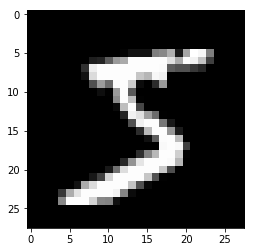

In [4]:
print (X_train.shape) #displaying the dimension of the dataset 
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='gray') #plotting the first sample in the training data

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) #reshaping the train data from (60000, 28, 28) to (60000, 28, 28, 1) because its gray scale image
X_test = X_test.reshape(X_test.shape[0], 28, 28,1) #reshaping the testdata from from (10000, 28, 28) to (10000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32') #converting the X_train matrices to float32 datatype
X_test = X_test.astype('float32') #converting the X_train matrices to float32 datatype
X_train /= 255 # normalizing the pixel values in range [0,1]
X_test /= 255 # normalizing the pixel values in range [0,1]

In [14]:
y_train[:10] #printing the first ten labels for the first ten images in the training data

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[:10] # printing the first ten one hot encoded labels in the training data


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation, MaxPooling2D #importing the activation function and maxpooling  

model = Sequential() # to make the layers sequentially like stacking the upcomming layers linearly
#adding convolution2d layer as a first layer in the network eith 32 kernels with size (3 X 3) and activation functionas as relu for the input image dimension (28 X 28 X 1) 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 
#Receptive field would be (3 X 3), Input shape (28 X 28 X 1) output shape (26 X 26 X 32)

#adding the one more convolutional layer for the input shape (26 X 26 X 32) with relu as a activation function and 64 kernels of size (3 X 3)
model.add(Convolution2D(64, 3, 3, activation='relu'))
#Receptive field would be (5 X 5), Input shape (26 X 26 X 32) output shape (24 X 24 X 64)

#adding the one more convolutional layer for the input shape (24 X 24 X 64) with relu as a activation function and 128 kernels of size (3 X 3)
model.add(Convolution2D(128, 3, 3, activation='relu'))
#Receptive field would be (7 X 7) Input shape (24 X 24 X 64) output shape (22 X 22 X 128)

#adding the maxpooling layer of pool size (2 X 2) for the input shape (22 X 22 X 128) with stride 2
model.add(MaxPooling2D(pool_size=(2, 2)))
#Receptive field would be (14 X 14) Input shape (22 X 22 X 128) output shape (11 X 11 X 128)

#adding the one more convolutional layer for the input shape (11 X 11 X 128) with relu as a activation function and 256 kernels of size (3 X 3)
model.add(Convolution2D(256, 3, 3, activation='relu'))
#Receptive field would be (16 X 16) Input shape (11 X 11 X 128) output shape (9 X 9 X 256)

#adding the one more convolutional layer for the input shape (9 X 9 X 256) with relu as a activation function and 512 kernels of size (3 X 3)
model.add(Convolution2D(512, 3, 3, activation='relu'))
#Receptive field would be (18 X 18) Input shape (9 X 9 X 256) output shape (7 X 7 X 512)

#adding the one more convolutional layer for the input shape (7 X 7 X 512) with relu as a activation function and 1024 kernels of size (3 X 3)
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#Receptive field would be (20 X 20) Input shape (7 X 7 X 512) output shape (5 X 5 X 1024)

#adding the one more convolutional layer for the input shape (5 X 5 X 1024) with relu as a activation function and 2048 kernels of size (3 X 3)
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#Receptive field would be (22 X 22) Input shape (5 X 5 X  1024) output shape (3 X 3 X 2048)

#adding the one more convolutional layer for the input shape (3 X 3 X 2048) with relu as a activation function and 10 kernels of size (3 X 3)
model.add(Convolution2D(10, 3, 3, activation='relu' ))
#Receptive field would be (24 X 24) Input shape (3 X 3 X  2048) output shape (1 X 1 X 10)

#flattening the three dimension matrix to one vector and adding softmax to classsify
model.add(Flatten()) 
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

In [0]:

#compiling the model with loss categorical cross entropy and optimizer adam and acuuracy as metric
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
#train the model with batchsize 32 and for 10 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.3026 - acc: 0.0994
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) # evaluate the trained model on the test data

In [21]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [23]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


In [0]:
# I think the model has some issue with the final layer of the network, final layer of the network where we added relu as an activation function
#inorder to compare with actual loss value, we are getting only positive values from 0 to infinite from the last layer so the output would be probably
#no limits. i think it is difficult to map those loss values